# 1. 데이터 불러오기와 데이터셋 나누기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/Fvote.csv', encoding='utf-8')

In [5]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [6]:
y=data[['vote']]

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, stratify=y)

In [10]:
y_train

,vote
68,0
8,0
10,0
67,1
90,1
...,...
176,0
186,0
7,1
160,1


# 2. Grid Search 

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [13]:
from sklearn.svm import SVC

In [14]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             return_train_score=True)

In [16]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [17]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.716


In [18]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.717


In [19]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [20]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005789,0.002825,0.003586,0.001315,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.6875,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,9,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.003456,0.000105,0.002249,0.000104,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.6875,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,9,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.004218,0.000846,0.002434,0.000220,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.6875,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,9,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
3,0.003682,0.000331,0.002257,0.000032,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.6875,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,9,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
4,0.003614,0.000091,0.002424,0.000237,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.6875,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,9,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.006634,0.000993,0.002295,0.000088,100,0.01,linear,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}",0.6875,0.68750,0.78125,0.677419,0.709677,0.708669,0.037794,51,0.746032,0.785714,0.738095,0.740157,0.708661,0.743732,0.024667
68,0.006710,0.001130,0.002420,0.000135,100,0.1,linear,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",0.6875,0.68750,0.78125,0.677419,0.709677,0.708669,0.037794,51,0.746032,0.785714,0.738095,0.740157,0.708661,0.743732,0.024667
69,0.007544,0.001809,0.002546,0.000362,100,1,linear,"{'C': 100, 'gamma': 1, 'kernel': 'linear'}",0.6875,0.68750,0.78125,0.677419,0.709677,0.708669,0.037794,51,0.746032,0.785714,0.738095,0.740157,0.708661,0.743732,0.024667
70,0.007731,0.002398,0.002863,0.001048,100,10,linear,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.6875,0.68750,0.78125,0.677419,0.709677,0.708669,0.037794,51,0.746032,0.785714,0.738095,0.740157,0.708661,0.743732,0.024667


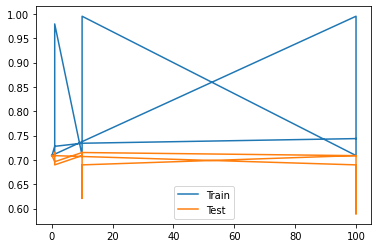

In [21]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

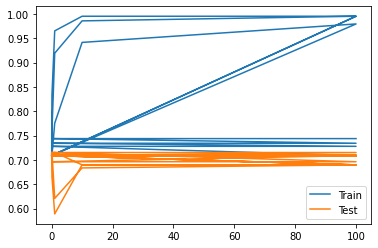

In [22]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
from scipy.stats import randint

In [25]:
param_distribs={'kernel': ['rbf'], 'C': randint(low=0.001, high=100), 
                'gamma': randint(low=0.001, high=100)}

In [26]:
from sklearn.svm import SVC

In [27]:
random_search=RandomizedSearchCV(SVC(), param_distributions=param_distribs, cv=5, return_train_score=True)

In [28]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f667a378910>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f667a3783d0>,
                                        'kernel': ['rbf']},
                   return_train_score=True)

In [29]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'C': 10, 'gamma': 98, 'kernel': 'rbf'}


In [30]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.690


In [31]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.717


In [32]:
result_random = random_search.cv_results_

In [33]:
result_random = pd.DataFrame(result_random)

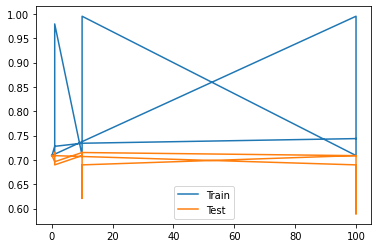

In [34]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

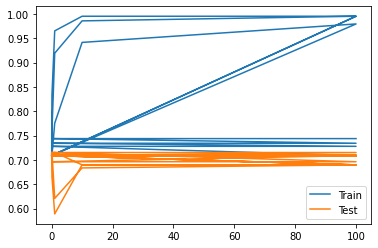

In [35]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 4. 모델평가

In [36]:
from sklearn.svm import SVC

In [37]:
svc1=SVC(C=95, gamma=75, kernel='rbf')

In [38]:
svc1.fit(X_train, y_train)

SVC(C=95, gamma=75)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
pred_train=svc1.predict(X_train)

In [41]:
confusion_train=confusion_matrix(y_train, pred_train)

In [42]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 45   1]
 [  0 112]]


In [43]:
pred_test=svc1.predict(X_test)

In [44]:
confusion_test=confusion_matrix(y_test, pred_test)

In [45]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 0 15]
 [ 0 38]]


In [46]:
from sklearn.metrics import f1_score

In [47]:
f1=f1_score(y_test, pred_test)

In [48]:
print("f1 score:\n", f1)

f1 score:
 0.8351648351648352


In [49]:
from sklearn.metrics import classification_report

In [50]:
cfreport=classification_report(y_test, pred_test)

In [51]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.72      1.00      0.84        38

    accuracy                           0.72        53
   macro avg       0.36      0.50      0.42        53
weighted avg       0.51      0.72      0.60        53



# 5. 다중분류의 적용

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import pandas as pd

In [54]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/Fvote.csv', encoding='utf-8')

In [55]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [56]:
y=data[['parties']]

In [57]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, stratify=y )

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [87]:
from sklearn.svm import SVC

In [88]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5)

In [89]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [90]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [91]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.525


In [92]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.528


In [93]:
svc2=SVC(C=10, gamma=0.001, kernel='linear')

In [94]:
svc2.fit(X_train, y_train)

SVC(C=10, gamma=0.001, kernel='linear')

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
pred_train=svc2.predict(X_train)

In [97]:
confusion_train=confusion_matrix(y_train, pred_train)

In [98]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[22  3  2 10]
 [ 2 26  3  9]
 [ 4  3  6  6]
 [ 7  6  1 48]]


In [99]:
pred_test=svc2.predict(X_test)

In [100]:
confusion_test=confusion_matrix(y_test, pred_test)

In [101]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 6  1  2  4]
 [ 1  9  1  2]
 [ 1  1  2  2]
 [ 2  3  2 14]]


In [102]:
from sklearn.metrics import f1_score

In [103]:
f1=f1_score(y_test, pred_test, average="micro" )

In [104]:
print("micro f1 score:\n", f1)

micro f1 score:
 0.5849056603773585


In [105]:
f2=f1_score(y_test, pred_test, average="macro" )

In [106]:
print("macro f1 score:\n", f2)

macro f1 score:
 0.5368152238728578


In [107]:
from sklearn.metrics import classification_report

In [108]:
cfreport=classification_report(y_test, pred_test)

In [109]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.60      0.46      0.52        13
           2       0.64      0.69      0.67        13
           3       0.29      0.33      0.31         6
           4       0.64      0.67      0.65        21

    accuracy                           0.58        53
   macro avg       0.54      0.54      0.54        53
weighted avg       0.59      0.58      0.58        53

